### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Load Data


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_def = pd.read_csv("drive/MyDrive/Colab Notebooks/Hackathon/VariableDefinitions.csv")
df_def

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the seller is based.
1,Maker,This is the manufacturer of the car. It is the brand name.
2,Model,This is the the name of the car product within a range of similar car products.
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is the amount the company will sell the car.
6,Type,"This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria."
7,Distance,This is the mileage of the car. It is how much distance it covered in its previous use


In [5]:
df_train = pd.read_csv("drive/MyDrive/Colab Notebooks/Hackathon/Train.csv")
df_train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [6]:
df_train.shape

(7205, 9)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [8]:
df_test = pd.read_csv('drive/MyDrive/Colab Notebooks/Hackathon/Test.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


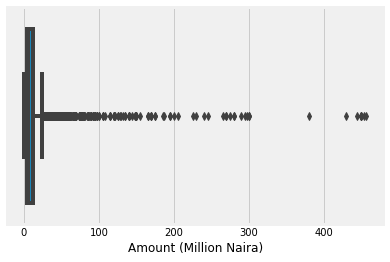

In [ ]:
# Boxplot to help with method of filling of numerical missing values
sns.boxplot(df_train["Amount (Million Naira)"])
plt.show()

In [9]:
# Since there are alot of outlier, median will be used to fill NA
df_train["Amount (Million Naira)"] = df_train["Amount (Million Naira)"].fillna(df_train["Amount (Million Naira)"].median())

In [10]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)

In [11]:
df.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


### Data Cleaning

In [12]:
df.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        23
Colour                       0
Amount (Million Naira)    2061
Type                       251
Distance                  3036
dtype: int64

In [13]:
# Check for rows that have all their values missing
df.isnull().all(axis=1).sum()

0

In [14]:
# Check for rows that have 50% of values missing
df[df.isnull().sum(axis=1)>4]

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance


In [15]:
# Null value percentage
(df.isnull().sum()/df.shape[0])*100

VehicleID                  0.000000
Location                   0.000000
Maker                      0.000000
Model                      0.000000
Year                       0.248219
Colour                     0.000000
Amount (Million Naira)    22.242607
Type                       2.708828
Distance                  32.764947
dtype: float64

In [16]:
# Remove the column Distance because it has a lot of null values
df = df.drop(["Distance"], axis=1)

In [17]:
# Remove the VehicleID column because it is not useful for modeling
df = df.drop(["VehicleID"], axis=1)

In [18]:
df.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type'],
      dtype='object')

In [19]:
# Fill categorical null values with their mode
df["Year"] = df["Year"].fillna(df["Year"].mode()[0])
df["Type"] = df["Type"].fillna(df["Type"].mode()[0])

In [20]:
# Rename the Amount column for convinient use
df.rename(columns={"Amount (Million Naira)": "Amount"}, inplace=True)

In [21]:
df.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour', 'Amount', 'Type'], dtype='object')

In [22]:
# Descriptive Stat of numeric column
df.describe()

,Amount
count,7205.000000
mean,11.833375
std,25.290819
min,0.450000
25%,3.500000
50%,5.650000
75%,11.500000
max,456.000000


In [23]:
df.describe(include='object')

,Location,Maker,Model,Year,Colour,Type
count,9266,9266,9266,9266,9266,9266
unique,3,56,1412,35,24,3
top,Lagos,Toyota,Camry,"2,008",Black,Foreign Used
freq,4240,3558,834,972,2738,6537


In [24]:
df.isnull().sum()

Location       0
Maker          0
Model          0
Year           0
Colour         0
Amount      2061
Type           0
dtype: int64

In [25]:
# Clean the values of the Year column
df["Year"] = df["Year"].str.replace(",", "")

In [26]:
df.head()

,Location,Maker,Model,Year,Colour,Amount,Type
0,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used
1,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used
2,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used
3,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used
4,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used


In [27]:
df["Year"] = df["Year"].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  9266 non-null   object 
 1   Maker     9266 non-null   object 
 2   Model     9266 non-null   object 
 3   Year      9266 non-null   int64  
 4   Colour    9266 non-null   object 
 5   Amount    7205 non-null   float64
 6   Type      9266 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 506.9+ KB


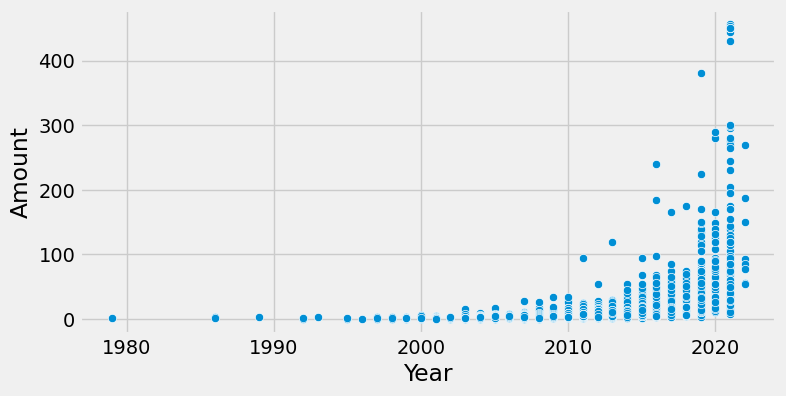

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Year', y="Amount", data = df_train)
plt.show()

### Data Transformation

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Maker']= le.fit_transform(df['Maker'])
df['Model'] = le.fit_transform(df['Model'])
df['Colour'] = le.fit_transform(df['Colour'])
df['Year'] = le.fit_transform(df['Year'])


### EDA

#### Univariate Analysis

c:\da\virtual\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


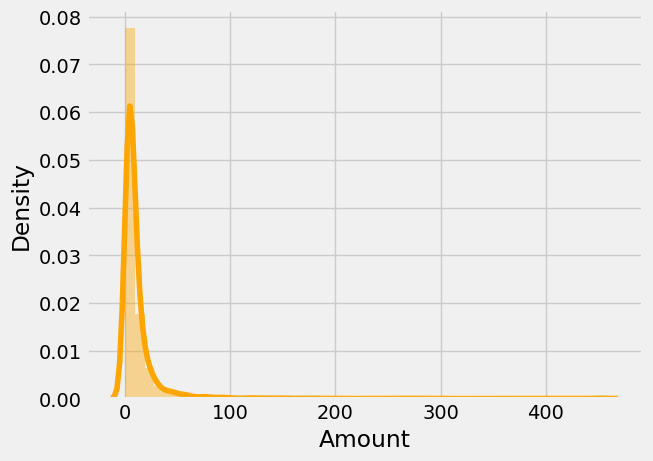

In [ ]:
sns.distplot(df_train['Amount'], color='orange')
plt.show()

### Cap Amount

In [30]:
# Remove outliers by capping amount at 300
df['Amount'].values[df['Amount'].values>300]=300

In [31]:
df[df['Amount']>300]

,Location,Maker,Model,Year,Colour,Amount,Type


### Data Transformation

In [32]:
df1 = df.copy()

In [33]:
df2 = df.copy()

In [34]:
# Drop first to avoid multicolinearity in Linear regression
df2 = pd.get_dummies(df2, columns = ['Type','Location'], drop_first=True)

In [35]:
df1 = pd.get_dummies(df1, columns = ['Type','Location'])

In [36]:
new_test1= df1[df_train.shape[0]:].reset_index(drop = True)
new_train1 = df1[:df_train.shape[0]]
                                              

In [37]:
new_test2= df2[df_train.shape[0]:].reset_index(drop = True)
new_train2 = df2[:df_train.shape[0]]
                                            

In [38]:
new_train1.head()

,Maker,Model,Year,Colour,Amount,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,17,142,23,18,2.2,0,0,1,1,0,0
1,19,1204,24,18,3.5,0,0,1,0,1,0
2,29,1040,22,17,9.2,0,1,0,0,0,1
3,34,590,29,3,22.8,0,1,0,1,0,0
4,53,659,14,17,2.6,0,0,1,0,1,0


In [39]:
x = new_train1.drop('Amount', axis=1)
y = new_train1["Amount"]

In [40]:
x1 = new_train2.drop('Amount', axis=1)

In [41]:
x.head()

,Maker,Model,Year,Colour,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,17,142,23,18,0,0,1,1,0,0
1,19,1204,24,18,0,0,1,0,1,0
2,29,1040,22,17,0,1,0,0,0,1
3,34,590,29,3,0,1,0,1,0,0
4,53,659,14,17,0,0,1,0,1,0


In [42]:
y

0        2.20
1        3.50
2        9.20
3       22.80
4        2.60
        ...  
7200     5.70
7201     4.00
7202     2.85
7203     8.65
7204     3.38
Name: Amount, Length: 7205, dtype: float64

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2,random_state=0)
# Check shape
print(f'Shape of x Train:{x_train.shape}\nShape of y Train:{y_train.shape}\nShape of x Test:{x_val.shape}\nShape of y Test:{y_val.shape}\n ')

Shape of x Train:(5764, 10)
Shape of y Train:(5764,)
Shape of x Test:(1441, 10)
Shape of y Test:(1441,)
 


In [44]:
from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(x1, y, test_size=0.2,random_state=0)
# Check shape
print(f'Shape of x Train:{x_train2.shape}\nShape of y Train:{y_train2.shape}\nShape of x Test:{x_val2.shape}\nShape of y Test:{y_val2.shape}\n ')

Shape of x Train:(5764, 8)
Shape of y Train:(5764,)
Shape of x Test:(1441, 8)
Shape of y Test:(1441,)
 


### Select and Train Model

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [46]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std()) 

In [47]:
scoring = ('neg_mean_squared_error')

In [48]:
# Linear Regression Model
lr = LinearRegression()
lr_scores = cross_val_score(lr, x_train2, y_train2, scoring=scoring, cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
display_scores(lr_rmse_scores)

Scores: [16.05302813 16.60753699 19.33719144 16.5786451  16.95577427]
Mean: 17.10643518596001
Standard deviation: 1.1520503790998247


In [49]:
# RandomForest Regressor Model
rf = RandomForestRegressor() 
rf_scores = cross_val_score(rf, x_train, y_train, scoring=scoring, cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores)

Scores: [ 7.88133152 14.92506491 12.72655758 10.0054573  12.73981489]
Mean: 11.655645239137252
Standard deviation: 2.4486709185048774


In [50]:
# XGBoost Regressor Model
xgbr = XGBRegressor(verbosity=0)
xgbr_scores = cross_val_score(xgbr, x_train, y_train, scoring=scoring, cv=5)
xgbr_rmse_scores = np.sqrt(-xgbr_scores)
display_scores(xgbr_rmse_scores)

Scores: [ 7.88000721 14.47919278 12.76357941 11.3226488  11.51694546]
Mean: 11.592474731221772
Standard deviation: 2.1709699714079274


### Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'eta': [0.01, 0.025, 0.05, 0.1, 0.2],
              'max_depth': [3, 5, 7, 8, 9, 10]
}


In [57]:
xgbr = XGBRegressor()
grid_search = GridSearchCV(
    xgbr, param_grid, cv=5, scoring=scoring, return_train_score=True
)

In [ ]:
grid_search.fit(x_train, y_train)

In [59]:
grid_search.best_params_

{'eta': 0.01, 'max_depth': 5}

In [69]:
grid_search.best_score_

-134.26267747477664

### XGBoost Model

In [64]:
model = XGBRegressor(max_depth=5, eta=0.01)
model.fit(x_train, y_train)

[01:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.01, max_depth=5)

In [65]:
y_pred = model.predict(x_val)

In [66]:
np.sqrt(mean_squared_error(y_val, y_pred))

8.750164007704663

### Test File

In [ ]:
new_test1.head()

,Maker,Model,Year,Colour,Amount,Type_Brand New,Type_Foreign Used,Type_Nigerian Used,Location_Abuja,Location_Ibadan,Location_Lagos
0,3,27,20,22,NaN,0,1,0,1,0,0
1,53,317,25,22,NaN,0,1,0,0,0,1
2,53,674,17,8,NaN,0,1,0,0,0,1
3,53,317,23,9,NaN,0,1,0,0,0,1
4,29,484,25,17,NaN,0,1,0,0,0,1


In [ ]:
new_test1.shape

(2061, 11)

In [ ]:
new_test1 = new_test1.drop('Amount', axis=1)

In [ ]:
car_price = model.predict(new_test1)
print(f'Test dataset car price: {car_price}')

Test dataset car price: [3.7466063 5.8936734 4.420363  ... 6.3805246 9.801429  4.0795784]


In [ ]:
car_price = np.around(car_price, 1)

### Submission

In [ ]:
sub = pd.read_csv('drive/MyDrive/Colab Notebooks/Hackathon/Submission.csv')
sub.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


In [ ]:
sub["Amount (Million Naira)"] = car_price
sub

,VehicleID,Amount (Million Naira)
0,VHL18518,3.700000
1,VHL17149,5.900000
2,VHL10927,4.400000
3,VHL12909,4.500000
4,VHL12348,8.100000
...,...,...
2056,VHL17903,22.700001
2057,VHL14018,8.000000
2058,VHL17473,6.400000
2059,VHL11480,9.800000
